In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import accuracy_score,mean_squared_error,classification_report,confusion_matrix
from sklearn.model_selection import train_test_split,GridSearchCV
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.metrics import classification_report, roc_curve
from sklearn.ensemble import GradientBoostingClassifier

In [38]:
df=pd.read_csv("Heart.csv")

In [39]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


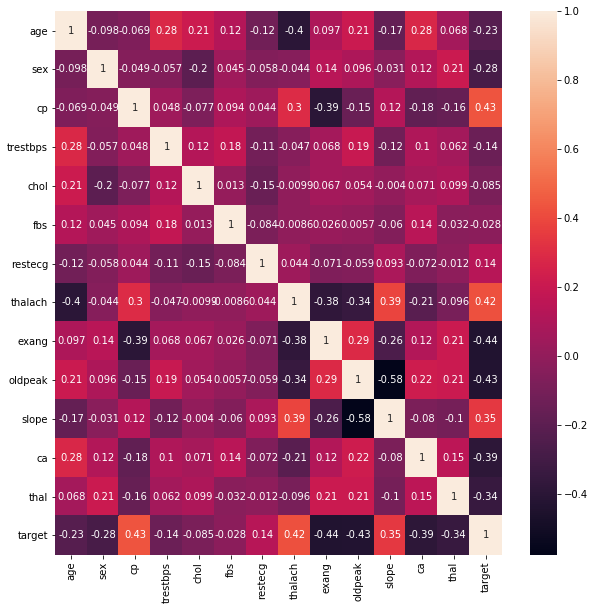

In [40]:
plt.figure(figsize=(10,10))
sns.heatmap(data=df.corr(), annot=True )
plt.show()

In [41]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [42]:
y=df["target"]
X= df.drop(["target"], axis=1)

In [43]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [44]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

 ## Logistic Regression*

In [46]:
from sklearn.linear_model import LogisticRegression
loj = LogisticRegression(solver = "liblinear")
loj_model = loj.fit(X,y)
loj_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [47]:
loj_model.predict(X)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,

In [48]:
mean_squared_error(y,loj_model.predict(X))

0.1485148514851485

In [49]:
accuracy_score(y,loj_model.predict(X))

0.8514851485148515

In [50]:
loj_model.predict_proba(X)[0:10][:,0:2]

array([[0.19347206, 0.80652794],
       [0.32930384, 0.67069616],
       [0.06417373, 0.93582627],
       [0.08102745, 0.91897255],
       [0.18229382, 0.81770618],
       [0.25448978, 0.74551022],
       [0.20792914, 0.79207086],
       [0.15597823, 0.84402177],
       [0.20067124, 0.79932876],
       [0.07759352, 0.92240648]])

In [51]:
y_probs = loj_model.predict_proba(X)
y_probs = y_probs[:,1]

In [52]:
y_probs[0:10]

array([0.80652794, 0.67069616, 0.93582627, 0.91897255, 0.81770618,
       0.74551022, 0.79207086, 0.84402177, 0.79932876, 0.92240648])

In [53]:
y_pred = [1 if i > 0.5 else 0 for i in y_probs]

In [54]:
y_pred[0:10]

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [55]:
print(confusion_matrix(y, y_pred))

[[105  33]
 [ 12 153]]


In [56]:
from sklearn.metrics import roc_auc_score,roc_curve

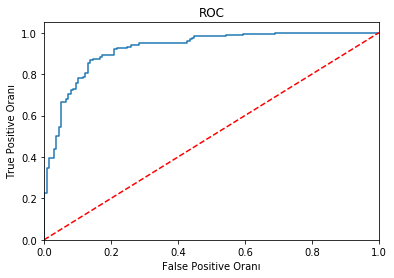

In [57]:
logit_roc_auc = roc_auc_score(y, loj_model.predict(X))
fpr, tpr, thresholds = roc_curve(y, loj_model.predict_proba(X)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Oranı')
plt.ylabel('True Positive Oranı')
plt.title('ROC')
plt.show()

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.30, 
                                                    random_state = 42)

In [59]:
mdl=LogisticRegression(solver="liblinear").fit(X_train,y_train)


In [60]:
mdl.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1], dtype=int64)

In [61]:
accuracy_score(y_test,mdl.predict(X_test))

0.8131868131868132

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    )

 ## Naive Bayes

In [63]:
NB=GaussianNB()

In [64]:
NB=NB.fit(X_train,y_train)

In [65]:
NB.predict(X_test)

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1], dtype=int64)

In [66]:
mean_squared_error(y_test,NB.predict(X_test))

0.2087912087912088

In [67]:
accuracy_score(y_test,NB.predict(X_test))

0.7912087912087912

              precision    recall  f1-score   support

           0       0.75      0.80      0.78        41
           1       0.83      0.78      0.80        50

    accuracy                           0.79        91
   macro avg       0.79      0.79      0.79        91
weighted avg       0.79      0.79      0.79        91



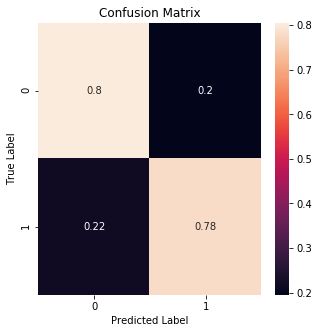

In [68]:
cm = confusion_matrix(y_test, NB.predict(X_test))
print(classification_report(y_test, NB.predict(X_test)))
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True,)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

## Support Vector Classifier

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    )

In [70]:
SVC(kernel="linear")

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [71]:
svm_model=SVC(kernel="linear").fit(X_train,y_train)

In [72]:
svm_model.predict(X_test)

array([1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 0], dtype=int64)

In [73]:
mean_squared_error(y_test,svm_model.predict(X_test))

0.1978021978021978

In [74]:
accuracy_score(y_test,svm_model.predict(X_test))

0.8021978021978022

In [75]:
svc_params={"C":np.arange(1,10)}
svc = SVC(kernel = "linear")
svc_cv_model=GridSearchCV(svc,
                          svc_params,
                          cv=10,
                          n_jobs=-1,
                          verbose=2)
svc_cv_model.fit(X_train,y_train)

Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   17.8s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:  1.3min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='linear', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': array([1, 2, 3, 4, 5, 6, 7, 8, 9])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [76]:
print("En iyi parametre :"+str(svc_cv_model.best_params_))

En iyi parametre :{'C': 9}


In [77]:
svc_tuned=SVC(kernel="linear",C=1).fit(X_train,y_train)
svc_tuned.predict(X_test)
mean_squared_error(y_test,svc_tuned.predict(X_test))

0.1978021978021978

In [78]:
accuracy_score(y_test,svc_tuned.predict(X_test))

0.8021978021978022

              precision    recall  f1-score   support

           0       0.81      0.72      0.76        40
           1       0.80      0.86      0.83        51

    accuracy                           0.80        91
   macro avg       0.80      0.79      0.80        91
weighted avg       0.80      0.80      0.80        91



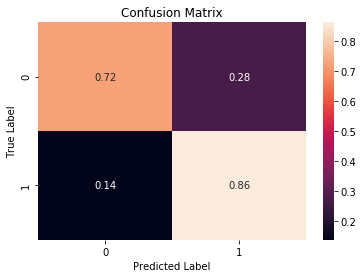

In [79]:
cm_svc=confusion_matrix(y_test,svm_model.predict(X_test))
print(classification_report(y_test, svm_model.predict(X_test)))
cm_svc=cm_svc.astype("float")/cm_svc.sum(axis=1)[:,np.newaxis]
sns.heatmap(cm_svc,annot=True)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


## Knn

In [80]:
knn=KNeighborsClassifier()

In [81]:
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [82]:
knn_model=knn.fit(X_train,y_train)

In [83]:
knn_model.predict(X_test)

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0], dtype=int64)

In [84]:
accuracy_score(y_test,knn_model.predict(X_test))

0.6483516483516484

In [85]:
mean_squared_error(y_test,knn_model.predict(X_test))

0.3516483516483517

In [86]:
print(classification_report(y_test, knn_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.59      0.65      0.62        40
           1       0.70      0.65      0.67        51

    accuracy                           0.65        91
   macro avg       0.65      0.65      0.65        91
weighted avg       0.65      0.65      0.65        91



In [87]:
knn_params={"n_neighbors":np.arange(1,100)}

In [88]:
knn_cv=GridSearchCV(knn,knn_params,cv=10)

In [89]:
knn_cv.fit(X_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scor

In [90]:
print("En iyi skor "+str(knn_cv.best_score_))
print("En iyi parametre "+str(knn_cv.best_params_))

En iyi skor 0.6976190476190476
En iyi parametre {'n_neighbors': 17}


In [91]:
knn_tuned=KNeighborsClassifier(32).fit(X_train,y_train)

In [92]:
knn_tuned.predict(X_test)

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0], dtype=int64)

In [93]:
accuracy_score(y_test,knn_tuned.predict(X_test))

0.5934065934065934

In [94]:
mean_squared_error(y_test,knn_tuned.predict(X_test))

0.4065934065934066

              precision    recall  f1-score   support

           0       0.53      0.60      0.56        40
           1       0.65      0.59      0.62        51

    accuracy                           0.59        91
   macro avg       0.59      0.59      0.59        91
weighted avg       0.60      0.59      0.59        91



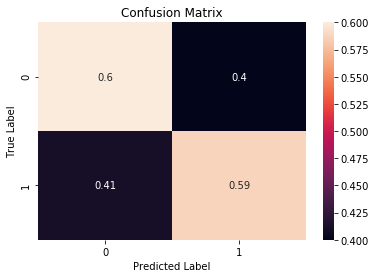

In [95]:
cm_knn=confusion_matrix(y_test,knn_tuned.predict(X_test))
print(classification_report(y_test, knn_tuned.predict(X_test)))
cm_knn=cm_knn.astype("float")/cm_knn.sum(axis=1)[:,np.newaxis]
sns.heatmap(cm_knn,annot=True)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


## Classification and Regression Trees

In [96]:
cart=DecisionTreeClassifier()

In [97]:
cart_model=DecisionTreeClassifier().fit(X_train,y_train)

In [98]:
!pip install skompiler

In [99]:
from skompiler import skompile

In [100]:
skompile?

Signature: skompile(*args, inputs=None)
Docstring:
Creates a SKAST expression from a given bound method of a fitted SKLearn model.
A shorthand notation for SKompiledModel(method, inputs)

Args:

    args:  Either a bound method of a trained model (e.g. skompile(model.predict_proba)),
           OR two arguments - a model and a method name (e.g. skompile(model, 'predict_proba')
           (which may be necessary for some models where the first option cannot be used due to metaclasses)
    
    inputs:  A string or a list of strings, or a SKAST node or a list of SKAST nodes,
             denoting the input variable(s) to your model.
             A single string corresponds to a vector variable (which will be indexed to access
             the components). A list of strings corresponds to a vector with separately named components.
           You may pass the inputs as a non-keyword argument as well (the last one in *args)
           If not specified, the default value of 'x' is used.

Ret

In [101]:
print(skompile(cart_model.predict).to("python/code"))

(((0 if x[7] <= 111.5 else ((((1 if x[10] <= 1.5 else 1 if x[1] <= 0.5 else
    0) if x[3] <= 109.0 else 1) if x[3] <= 158.0 else 1 if x[2] <= 1.5 else
    0) if x[4] <= 327.5 else 0 if x[9] <= 0.30000001192092896 else 1) if x[
    11] <= 0.5 else (1 if x[1] <= 0.5 else 0) if x[2] <= 0.5 else 1 if x[0] <=
    55.5 else 1 if x[7] <= 163.0 else 1 if x[4] <= 213.5 else 0) if x[9] <=
    1.699999988079071 else 0 if x[7] <= 147.5 else 1 if x[0] <= 54.5 else 1 if
    x[7] <= 153.0 else 0) if x[12] <= 2.5 else (((1 if x[7] <= 140.5 else 0
    ) if x[9] <= 0.6000000089406967 else 0 if x[2] <= 2.5 else 1) if x[7] <=
    152.0 else (((1 if x[3] <= 146.0 else 0) if x[0] <= 47.0 else 0) if x[0
    ] <= 51.5 else 1 if x[3] <= 161.0 else 0 if x[9] <= 0.3500000014901161 else
    1) if x[9] <= 2.4999999403953552 else 0) if x[11] <= 0.5 else 1 if x[4] <=
    151.5 else 0 if x[0] <= 67.5 else 0 if x[4] <= 273.0 else 1)



C:\Users\hales\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.linear_model.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.linear_model. Anything that cannot be imported from sklearn.linear_model is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\hales\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.tree.tree module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.tree. Anything that cannot be imported from sklearn.tree is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\hales\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.decomposition.pca module is  deprecated in version 0.22 and will be removed in v

In [102]:
!pip install astor

In [103]:
cart_model.predict(X_test)

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0], dtype=int64)

In [104]:
accuracy_score(y_test,cart_model.predict(X_test))

0.7032967032967034

In [105]:
1-accuracy_score(y_test,cart_model.predict(X_test))

0.29670329670329665

In [106]:
cart?

Type:        DecisionTreeClassifier
String form:
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
           <...> action_leaf=0.0, presort='deprecated',
           random_state=None, splitter='best')
File:        c:\users\hales\anaconda3\lib\site-packages\sklearn\tree\_classes.py
Docstring:  
A decision tree classifier.

Read more in the :ref:`User Guide <tree>`.

Parameters
----------
criterion : {"gini", "entropy"}, default="gini"
    The function to measure the quality of a split. Supported criteria are
    "gini" for the Gini impurity and "entropy" for the information gain.

splitter : {"best", "random"}, default="best"
    The strategy used to choose the split at each node. Supported
    strategies are "best" to choose the best split and "random" to choose
    the best random split.

max_depth : int, default=None
    The maximum depth of the tree. If None, then nodes are expanded until
    all leaves are pure or until all leaves contain less than
    min

In [107]:
cart_params={"max_depth":range(3,10),
            "min_samples_split":range(3,60)}

In [108]:
cart_cv=GridSearchCV(cart,cart_params,cv=10,n_jobs=-1,verbose=2)

In [109]:
cart_cvmodel=cart_cv.fit(X_train,y_train)

Fitting 10 folds for each of 399 candidates, totalling 3990 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 3865 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done 3990 out of 3990 | elapsed:    7.7s finished


In [110]:
cart_cvmodel.best_params_

{'max_depth': 4, 'min_samples_split': 9}

In [111]:
cart_tuned=DecisionTreeClassifier(max_depth=7,min_samples_split=18).fit(X_train,y_train)

In [112]:
cart_tuned.predict(X_test)

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0], dtype=int64)

In [113]:
y_test[0:5]

18     1
286    0
224    0
258    0
10     1
Name: target, dtype: int64

In [114]:
accuracy_score(y_test,cart_tuned.predict(X_test))

0.7362637362637363

              precision    recall  f1-score   support

           0       0.71      0.68      0.69        40
           1       0.75      0.78      0.77        51

    accuracy                           0.74        91
   macro avg       0.73      0.73      0.73        91
weighted avg       0.74      0.74      0.74        91



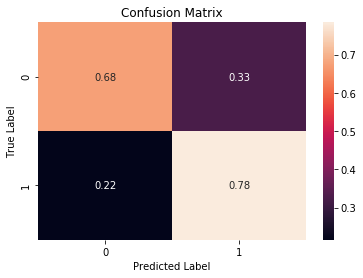

In [115]:
cm_cart=confusion_matrix(y_test,cart_tuned.predict(X_test))
print(classification_report(y_test,cart_tuned.predict(X_test)))
cm_cart=cm_cart.astype("float")/cm_cart.sum(axis=1)[:,np.newaxis]
sns.heatmap(cm_cart,annot=True)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

## Gradient Boosting Classifier

In [116]:
gbm=GradientBoostingClassifier()

In [117]:
gbm_model=gbm.fit(X_train,y_train)

In [118]:
gbm_model.predict(X_test)

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0], dtype=int64)

In [119]:
accuracy_score(y_test,gbm_model.predict(X_test))

0.7802197802197802

In [120]:
## model tuning

In [121]:
gbm_model

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [122]:
gbm_params={"max_depth":[3,5,7,10],
            "min_samples_split":[3,5,7,10],
            "learning_rate":[0.1,0.05,0.01,0.001],
             "n_estimators":[100,200,500],
           }
gbm_cv_=GridSearchCV(gbm,gbm_params,cv=10,n_jobs=-1,verbose=2)

In [123]:
gbm_cv_.fit(X_train,y_train)

Fitting 10 folds for each of 192 candidates, totalling 1920 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done 218 tasks      | elapsed:   21.9s
[Parallel(n_jobs=-1)]: Done 421 tasks      | elapsed:   45.0s
[Parallel(n_jobs=-1)]: Done 704 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 1069 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 1514 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 1920 out of 1920 | elapsed:  4.9min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_...
                 

In [124]:
print(" en iyi parametreler "+ str(gbm_cv_.best_params_))

 en iyi parametreler {'learning_rate': 0.1, 'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 200}


In [125]:
gbm_tuned=GradientBoostingClassifier(learning_rate = 0.1, 
                                 max_depth = 3,
                                min_samples_split = 3,
                                n_estimators = 500).fit(X_train,y_train)

In [126]:
gbm_tuned.predict(X_test)

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0], dtype=int64)

In [127]:
accuracy_score(y_test,gbm_tuned.predict(X_test))

0.8131868131868132

              precision    recall  f1-score   support

           0       0.83      0.72      0.77        40
           1       0.80      0.88      0.84        51

    accuracy                           0.81        91
   macro avg       0.82      0.80      0.81        91
weighted avg       0.81      0.81      0.81        91



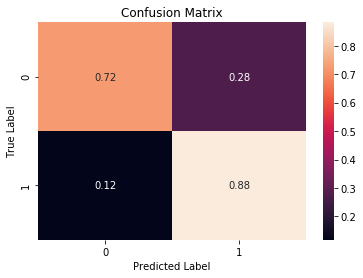

In [128]:
cm_gbm=confusion_matrix(y_test,gbm_tuned.predict(X_test))
print(classification_report(y_test,gbm_tuned.predict(X_test)))
cm_gbm=cm_gbm.astype("float")/cm_gbm.sum(axis=1)[:,np.newaxis]
sns.heatmap(cm_gbm,annot=True)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

##  XGBOOST

In [129]:
!pip install xgboost

In [130]:
from xgboost import XGBClassifier

In [131]:
xgb=XGBClassifier()

In [132]:
xgb_model=xgb.fit(X_train,y_train)

[00:27:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\hales\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [133]:
xgb_model.predict(X_test)

C:\Users\hales\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0], dtype=int64)

In [134]:
accuracy_score(y_test,xgb_model.predict(X_test))

0.7582417582417582

model tuning

In [135]:
xgb

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=True,
              validate_parameters=1, verbosity=None)

In [136]:
xgb_params={"max_depth":[3,4,8,10],
            "subsample":[0.5,0.7,0.9],
            "min_samples_split":[3,5,7],
            "learning_rate":[0.1,0.2,0.3,0.4],
             "n_estimators":[100,200,500],
           }
xgb_cv_=GridSearchCV(xgb,xgb_params,cv=10,n_jobs=-1,verbose=2)

In [137]:
xgb_cv_.fit(X_train,y_train)

Fitting 10 folds for each of 432 candidates, totalling 4320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   12.5s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   31.9s
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:   58.4s
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 1977 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 3273 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 4320 out of 4320 | elapsed:  5.8min finished
C:\Users\hales\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pa

[00:33:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "min_samples_split" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[00:33:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=10, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0, gpu_id=-1,
                                     importance_type='gain',
                                     interaction_constraints='',
                                     learning_rate=0.300000012,
                                     max_delta_step=0, max_depth=6,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints='()',
                                     n_estimators=100, n_jo...
                                     scale_pos_weight=1, subsample=1,
                                     tree_method='exact',
                                     use_label_encoder=True,
                                     validate_parameters=1, verbosity=None),
             iid

In [139]:
print("en iyi params " + str(xgb_cv_.best_params_))

en iyi params {'learning_rate': 0.4, 'max_depth': 3, 'min_samples_split': 3, 'n_estimators': 500, 'subsample': 0.9}


In [140]:
xgb_tuned=XGBClassifier(learning_rate = 0.1, 
                                 max_depth = 3,
                                min_samples_split = 3,
                                n_estimators = 100,
                                subsample=0.9).fit(X_train,y_train)

[00:34:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "min_samples_split" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[00:34:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [141]:
xgb_tuned.predict(X_test)

C:\Users\hales\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0], dtype=int64)

In [142]:
accuracy_score(y_test,xgb_tuned.predict(X_test))

0.7912087912087912

              precision    recall  f1-score   support

           0       0.80      0.70      0.75        40
           1       0.79      0.86      0.82        51

    accuracy                           0.79        91
   macro avg       0.79      0.78      0.78        91
weighted avg       0.79      0.79      0.79        91



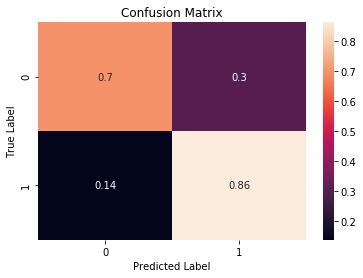

In [143]:
cm_xgb=confusion_matrix(y_test,xgb_tuned.predict(X_test))
print(classification_report(y_test,xgb_tuned.predict(X_test)))
cm_xgb=cm_xgb.astype("float")/cm_xgb.sum(axis=1)[:,np.newaxis]
sns.heatmap(cm_xgb,annot=True)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

## Random Forest

In [144]:
 rf=RandomForestClassifier()

In [145]:
rf_model=rf.fit(X_train,y_train)

In [146]:
rf_model.predict(X_test)

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0], dtype=int64)

In [147]:
accuracy_score(y_test,rf_model.predict(X_test))

0.8131868131868132

model tuning 

In [148]:
rf

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [149]:
rf_params={"max_depth": [2,5,8,10],
            "max_features": [2,5,8],
            "n_estimators": [10,100,500,1000],
            "min_samples_split": [2,5,10]
           }

In [150]:
rf_cv=GridSearchCV(rf,rf_params,cv=10,n_jobs=-1,verbose=2)

In [151]:
rf_cv.fit(X_train,y_train)

Fitting 10 folds for each of 144 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  62 tasks      | elapsed:   16.8s
[Parallel(n_jobs=-1)]: Done 186 tasks      | elapsed:   51.6s
[Parallel(n_jobs=-1)]: Done 389 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 672 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 1037 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed:  7.2min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rand

In [152]:
print("En iyi parametreler: " + str(rf_cv.best_params_))

En iyi parametreler: {'max_depth': 2, 'max_features': 2, 'min_samples_split': 5, 'n_estimators': 1000}


In [153]:
rf_tuned=RandomForestClassifier(max_depth=5,max_features=2,
                               min_samples_split=2,n_estimators=100).fit(X_train,y_train)

In [154]:
rf_tuned.predict(X_test)

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0], dtype=int64)

In [155]:
accuracy_score(y_test,rf_tuned.predict(X_test))

0.8241758241758241

              precision    recall  f1-score   support

           0       0.83      0.75      0.79        40
           1       0.82      0.88      0.85        51

    accuracy                           0.82        91
   macro avg       0.83      0.82      0.82        91
weighted avg       0.82      0.82      0.82        91



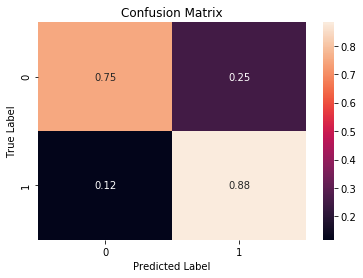

In [156]:
cm_rf=confusion_matrix(y_test,rf_tuned.predict(X_test))
print(classification_report(y_test,rf_tuned.predict(X_test)))
cm_rf=cm_rf.astype("float")/cm_rf.sum(axis=1)[:,np.newaxis]
sns.heatmap(cm_rf,annot=True)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

## Final

-
KNeighborsClassifier:
Accuracy: 59.3407%
-
LogisticRegression:
Accuracy: 81.3187%
-
SVC:
Accuracy: 80.2198%
-
GaussianNB:
Accuracy: 80.2198%
-
DecisionTreeClassifier:
Accuracy: 73.6264%
-
GradientBoostingClassifier:
Accuracy: 81.3187%
-
XGBClassifier:
Accuracy: 79.1209%
-
RandomForestClassifier:
Accuracy: 82.4176%


C:\Users\hales\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


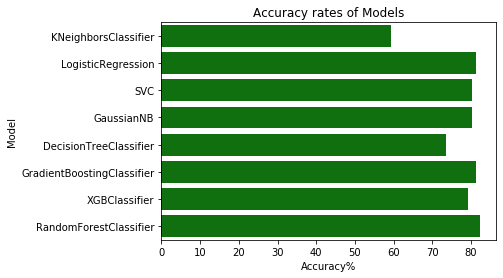

In [164]:
models = [
    knn_tuned,
    loj_model,
    svc_tuned,
    NB,
    cart_tuned,
    gbm_tuned,
    xgb_tuned,
    rf_tuned,
]
result=[]
results=pd.DataFrame(columns=["Model","Accuracy"])
for model in models:
    names = model.__class__.__name__
    accuracy = accuracy_score(y_test,model.predict(X_test))
    print("-")
    print(names + ":" )
    print("Accuracy: {:.4%}".format(accuracy))
    result = pd.DataFrame([[names, accuracy*100]], columns= ["Model","Accuracy"])
    results = results.append(result)
    
results.head()  
sns.barplot(x= 'Accuracy', y = 'Model',data=results, color="g")
plt.xlabel('Accuracy%')
plt.ylabel('Model')
plt.title('Accuracy rates of Models'); 